<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/banner_sdc.png">


<center><h1 style="font-size:2em;color:#2467C0"> Semáforos amarillos
 </h1></center>
<br>
<table>
<col width="650">
<col width="350">
<tr>
<td><img src="figuras/semaforos_amarillo.png" align="middle" style="width:850px;"/></td>
<td>
    
    
**Objetivo:**
    
    
Encontrar la señal amarilla de los semáforos
    
<br>
</td>
</tr>
</table>

# Cargar librerias

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2 as cv

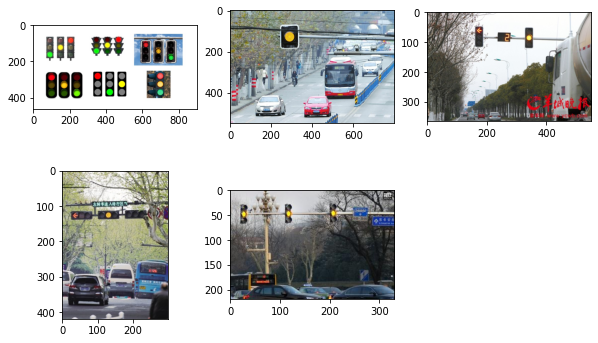

In [2]:
img0 = cv.imread('figuras/semaforo.jpg')
img0 = cv.cvtColor(img0, cv.COLOR_BGR2RGB)

img1 = cv.imread('figuras/semaforo_amarillo_1.jpg')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)

img2 = cv.imread('figuras/semaforo_amarillo_2.jpg')
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

img3 = cv.imread('figuras/semaforo_amarillo_3.jpg')
img3 = cv.cvtColor(img3, cv.COLOR_BGR2RGB)

img4 = cv.imread('figuras/semaforo_amarillo_4.jpg')
img4 = cv.cvtColor(img4, cv.COLOR_BGR2RGB)

#Imprimiendo las imagenes

plt.figure(figsize=(10,6))

plt.subplot(231)
plt.imshow(img0)

plt.subplot(232)
plt.imshow(img1)

plt.subplot(233)
plt.imshow(img2)

plt.subplot(234)
plt.imshow(img3)

plt.subplot(235)
plt.imshow(img4)

plt.show()

# Definiendo las funciones para encontrar circulos amarillos

In [3]:
d = {'Imagen': [], 
     'pixel_value/n': [],
     'Pass': []}
total_circles = pd.DataFrame(d)

In [4]:
def hsv_convert(image):
    return cv.cvtColor(image, cv.COLOR_BGR2HSV)

In [5]:
#definimos una función que retorne la mascara para el color amarillo
def green_finder(image):
    
    lower_green = np.array([42,73,44])
    upper_green = np.array([100,255,255])

    img_hsv = hsv_convert(image)
    mask = cv.inRange(img_hsv, lower_green, upper_green)
    mask_green = mask
    
    #Revisamos los valores de los pixeles
    uniqueValues, occurCount = np.unique(mask_green , return_counts=True)
    print("Valores : " , uniqueValues)
    print("Ocurrencia : ", occurCount)
    
    return mask_green

In [6]:
def circle_finder(img):
    #print('in circle_finder, circles found')
    circles = cv.HoughCircles(img, cv.HOUGH_GRADIENT, 1, 30, param1 = 50, param2 = 5, minRadius = 0, maxRadius = 30)
    #print(circles)
    return circles

In [7]:
def circle_writer(original_image, name):

    #counter solo sirve para ver cuantos circulos pasaron la prueba
    counter = 0
    circle_name = []
    circle_values = []
    circle_logical = []
    global total_circles
        
    print('-----------------------------------------')
    
    #Encontrar la mascara
    img_green_mask = green_finder(original_image)
    
    #Estética de escritura
    font = cv.FONT_HERSHEY_SIMPLEX
    region = 5
    
    #Circulos
    green_circles = circle_finder(img_green_mask)

    #Entra si existe un circulo
    if green_circles is not None:
        green_circles = np.uint16(np.around(yellow_circles))
        
        #Para cada circulo
        for i in green_circles[0, :]:
            
            
            pixel_value = 0.0
            n = 0.0
            check = False
            #print(i)
            
            for j in range(-region, region):
                for k in range(-region, region):
                    pixel_value += img_green_mask[i[1]+j, i[0]+k]
                    n += 1
    
            #print("in circle_writer, pixel_value/n:", pixel_value/n)
        
            #checar el valor de > n, ya que esto define la 
            #precisión/sensibilidad del filtro
            
            if pixel_value/n > 131:
                #print("in circle_writer yellow circle found ***********")
                cv.circle(original_image, (i[0], i[1]), i[2]+10, (0,255,255), 2)
                cv.putText(original_image, 'Amarillo', (i[0]-i[2], i[1]-i[2]-10), font, 1, (0, 255, 255), 2, cv.LINE_AA)
                counter += 1
                check = True
                
            #Llenando los arrays
            circle_name.append(name)
            circle_values.append(pixel_value/n)
            circle_logical.append(check)
    
    data = {'Imagen': circle_name, 
            'pixel_value/n': circle_values, 
            'Pass': circle_logical}
    
    circulos = pd.DataFrame(data)
    print(circulos)
    total_circles = pd.concat([total_circles, circulos], ignore_index=True)
    
    print('***** Valor mínimo:', circulos[circulos['Pass'] == True]['pixel_value/n'].min())
    
    
    
    
    #frames = [total_circles, circulos]
    #total_circles = pd.concat(frames)
    return cv.cvtColor(original_image, cv.COLOR_BGR2RGB)

# Probando funciones

In [8]:
#Definiendo imagenes
img0 = cv.imread('figuras/semaforo.jpg')
img1 = cv.imread('figuras/semaforo_amarillo_1.jpg')
img2 = cv.imread('figuras/semaforo_amarillo_2.jpg')
img3 = cv.imread('figuras/semaforo_amarillo_3.jpg')
img4 = cv.imread('figuras/semaforo_amarillo_4.jpg')
img5 = cv.imread('figuras/semaforo_amarillo_5.jpg')
img6 = cv.imread('figuras/semaforo_amarillo_6.jpg')
img7 = cv.imread('figuras/semaforo_amarillo_7.jpg')
img8 = cv.imread('figuras/semaforo_amarillo_8.jpg')
img9 = cv.imread('figuras/semaforo_amarillo_9.jpg')


In [9]:
#Encontrando y dibujando circulos para cada imagen
img0 = circle_writer(img0, 'img0')
img1 = circle_writer(img1, 'img1')
img2 = circle_writer(img2, 'img2')
img3 = circle_writer(img3, 'img3')
img4 = circle_writer(img4, 'img4')
img5 = circle_writer(img5, 'img5')
img6 = circle_writer(img6, 'img6')
img7 = circle_writer(img7, 'img7')
img8 = circle_writer(img8, 'img8')
img9 = circle_writer(img9, 'img9')

-----------------------------------------
Valores :  [  0 255]
Ocurrencia :  [404203  11158]


NameError: name 'yellow_circles' is not defined

# Analisis de datos para elegir pixel_value/n

In [ ]:
total_circles[total_circles['Pass'] == True]


In [ ]:
small = total_circles[total_circles['Pass'] == True]['pixel_value/n'].min()
print('Imagen con el número de pixel_value/n más pequeño')
print(total_circles[total_circles['pixel_value/n'] == min]['Imagen'])
print('Valor:', small)


# Impresión de imángenes

In [ ]:
plt.figure(figsize=(30, 30))

plt.subplot(321)
plt.imshow(img0)
plt.title("img0")


plt.subplot(322)
plt.imshow(img1)
plt.title("img1")


plt.subplot(323)
plt.imshow(img2)
plt.title("img2")


plt.subplot(324)
plt.imshow(img3)
plt.title("img3")


plt.subplot(325)
plt.imshow(img4)
plt.title("img4")


plt.show()

plt.figure(figsize=(30, 30))

plt.subplot(321)
plt.imshow(img5)
plt.title("img5")


plt.subplot(322)
plt.imshow(img6)
plt.title("img6")


plt.subplot(323)
plt.imshow(img7)
plt.title("img7")


plt.subplot(324)
plt.imshow(img8)
plt.title("img8")


plt.subplot(325)
plt.imshow(img9)
plt.title("img9")


plt.show()